## Skin diff 离群点分类器指标

In [1]:
import time
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
roc_train = []
prn_train = []
roc_test = []
prn_test = []

In [3]:
winediff = open("skindiffResults.txt","r")
lines = winediff.readlines()

In [4]:
clf_num = 0
clf_name = ['KNN', 'avg KNN', 'PCA', 'MCD', 'CBLOF','FB', 'HBOS', 'ISOF']

In [5]:
clf_name

['KNN', 'avg KNN', 'PCA', 'MCD', 'CBLOF', 'FB', 'HBOS', 'ISOF']

In [6]:
def get_roc_prn(line):
    item = line.split(" ")
    roc = float(item[0].split(":")[1])
    prn = float(item[1].split(":")[1])
    return roc, prn

In [7]:
train_test = False

In [8]:
for line in lines:
    if 'roc' in line:
        roc, prn = get_roc_prn(line)
        if train_test:
            roc_test.append(roc)
            prn_test.append(prn)
            train_test = False
        else:
            roc_train.append(roc)
            prn_train.append(prn)
            train_test = True

In [9]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

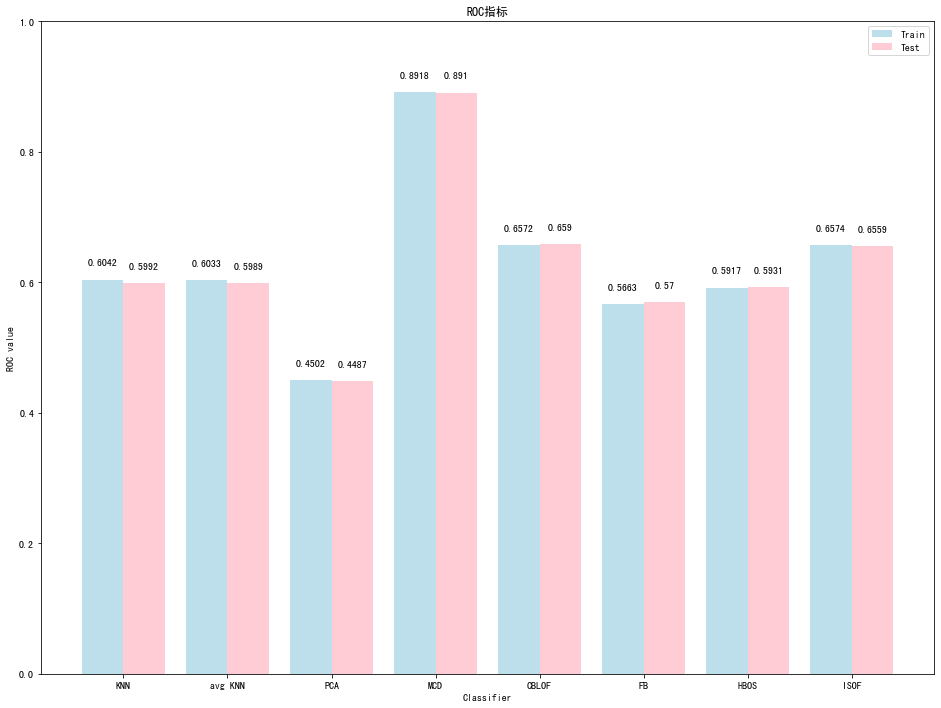

In [10]:
# 绘制ROC信息
plt.figure(figsize=(16,12))
x = range(len(clf_name))

bar1 = plt.bar(x = [i - 0.2 for i in x], height = roc_train, width = 0.4, alpha = 0.8, color = 'lightblue',label = 'Train')
bar2 = plt.bar(x = [i + 0.2 for i in x], height = roc_test, width = 0.4, alpha = 0.8,color = 'pink',label = 'Test')

plt.xticks(x,clf_name)
plt.ylim(0,1)
plt.title('ROC指标')
plt.xlabel('Classifier')
plt.ylabel('ROC value')
plt.legend()

for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.02, str(height), ha="center", va="bottom")
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.02, str(height), ha="center", va="bottom")
plt.show()

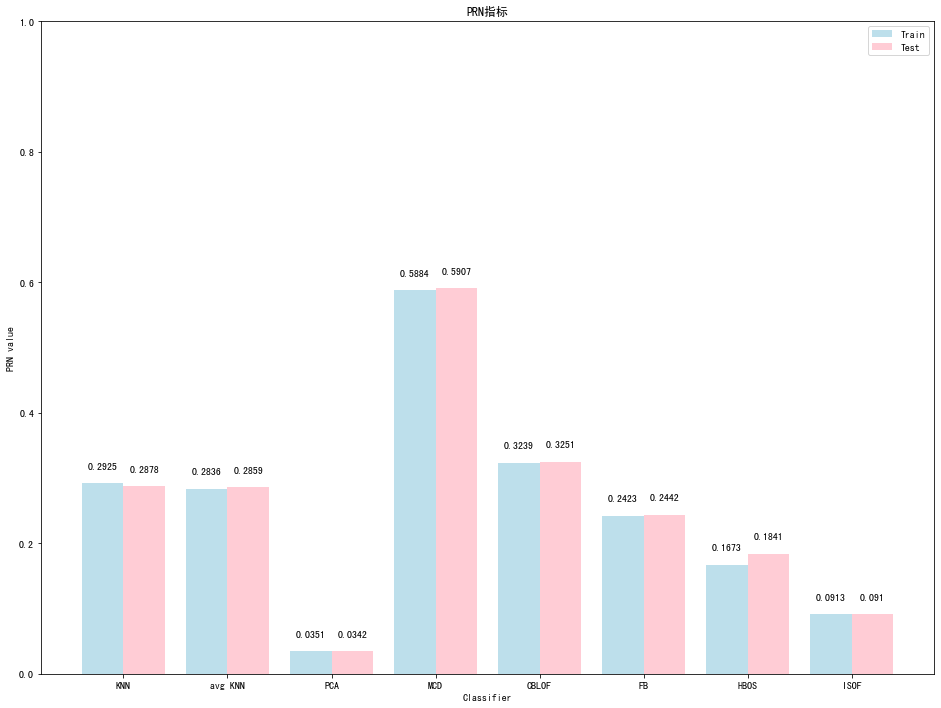

In [11]:
# 绘制PRN信息
plt.figure(figsize=(16,12))
x = range(len(clf_name))

bar1 = plt.bar(x = [i - 0.2 for i in x], height = prn_train, width = 0.4, alpha = 0.8, color = 'lightblue',label = 'Train')
bar2 = plt.bar(x = [i + 0.2 for i in x], height = prn_test, width = 0.4, alpha = 0.8,color = 'pink',label = 'Test')

plt.xticks(x,clf_name)
plt.ylim(0,1)
plt.title('PRN指标')
plt.xlabel('Classifier')
plt.ylabel('PRN value')
plt.legend()

for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.02, str(height), ha="center", va="bottom")
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.02, str(height), ha="center", va="bottom")

plt.show()

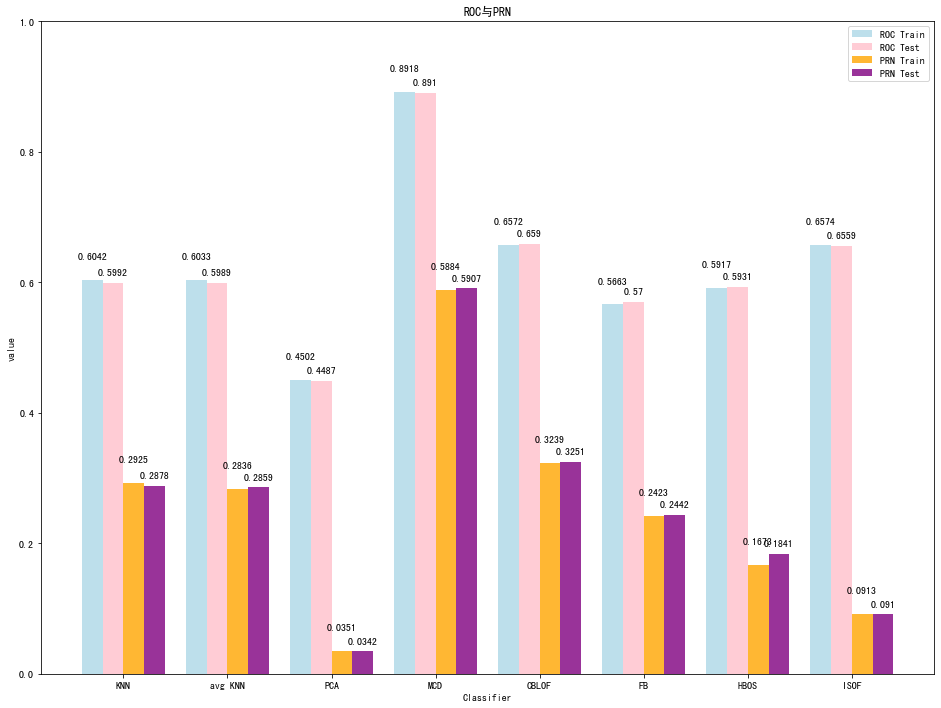

In [15]:
# 绘制ROC + PRN信息
plt.figure(figsize=(16,12))
x = range(len(clf_name))

bar1 = plt.bar(x = [i - 0.3 for i in x], height = roc_train, width = 0.2, alpha = 0.8, color = 'lightblue',label = 'ROC Train')
bar2 = plt.bar(x = [i - 0.1 for i in x], height = roc_test, width = 0.2, alpha = 0.8,color = 'pink',label = 'ROC Test')
bar3 = plt.bar(x = [i + 0.1 for i in x], height = prn_train, width = 0.2, alpha = 0.8, color = 'orange',label = 'PRN Train')
bar4 = plt.bar(x = [i + 0.3 for i in x], height = prn_test, width = 0.2, alpha = 0.8,color = 'purple',label = 'PRN Test')

plt.xticks(x,clf_name)
plt.ylim(0,1)
plt.title('ROC与PRN')
plt.xlabel('Classifier')
plt.ylabel('value')
plt.legend()

for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.03, str(height), ha="center", va="bottom")
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.01, str(height), ha="center", va="bottom")
for rect in bar3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.03, str(height), ha="center", va="bottom")
for rect in bar4:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.01, str(height), ha="center", va="bottom")

plt.show()

从以上的图表中我们可以看出，在8种离群点检测的方法中，MCD的效果是最好的；PCA的检测结果是最差的。  
且测试的结果普遍比训练的结果低，说明原数据集的离群点有不稳定因素，导致训练结果有误差。   
roc的结果除PCA外，均在56%以上，  
prn的结果比较低，大部分在10%--30%之间，MCD具有最高的prn值：59%左右；mcd具有最低的prn值：3%左右。